# Scaling the ML Prototype

### Contents:
1. Data
    - Show dataset
    - Show custom dataset
        - Model Training on custom dataset
2. Problem Description
    - Discuss use cases
    - Potential Data Types
        - Live Streaming
            - Wifi Cameras, RTSP, Home Security
        - Batch
            - Parking Lot surveillance
            - Detections DB, Search function, Analytics metrics
3. Scaling
    - Model Performance
        - Time 
            - CPU vs GPU
        - Space
            - Downsample video fps
    - Model Deployment
        - Network Traffic
            - nginx
            - gunicorn
            - AWS: ECR, ECS, and EC2
        - Data Storage
            - Database Solution for Detections
            - Input video handling
            - Detections images handling

## 1. Data

Dataset
- https://viratdata.org/ 
    - hosted locally at /Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/videos_original

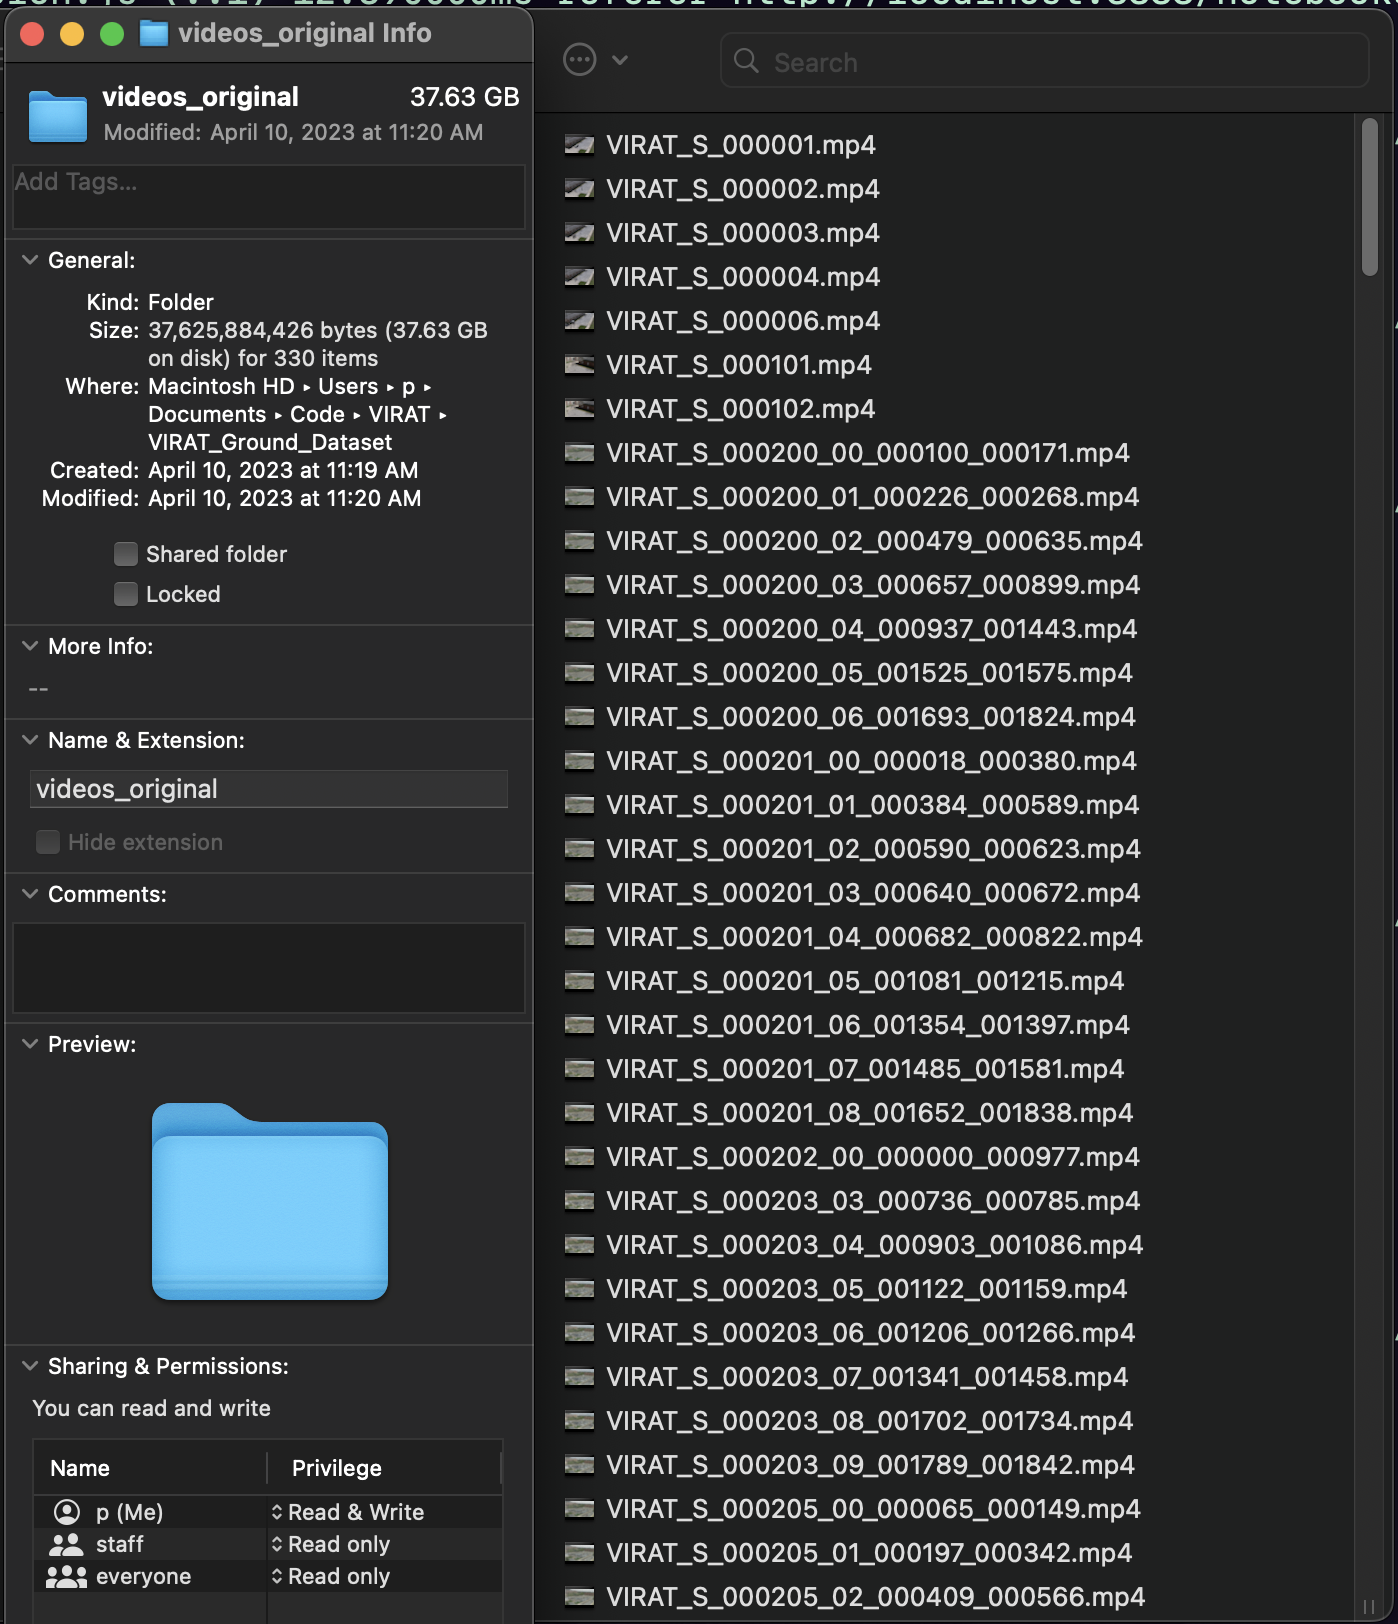

In [1]:
# show raw dataset .mp4 data as its locally hosted
from IPython.display import Image, display
image_path = "/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/images/VIRAT_Data.png"
display(Image(filename=image_path))

Custom Dataset
- For training
- Sample of images from each video

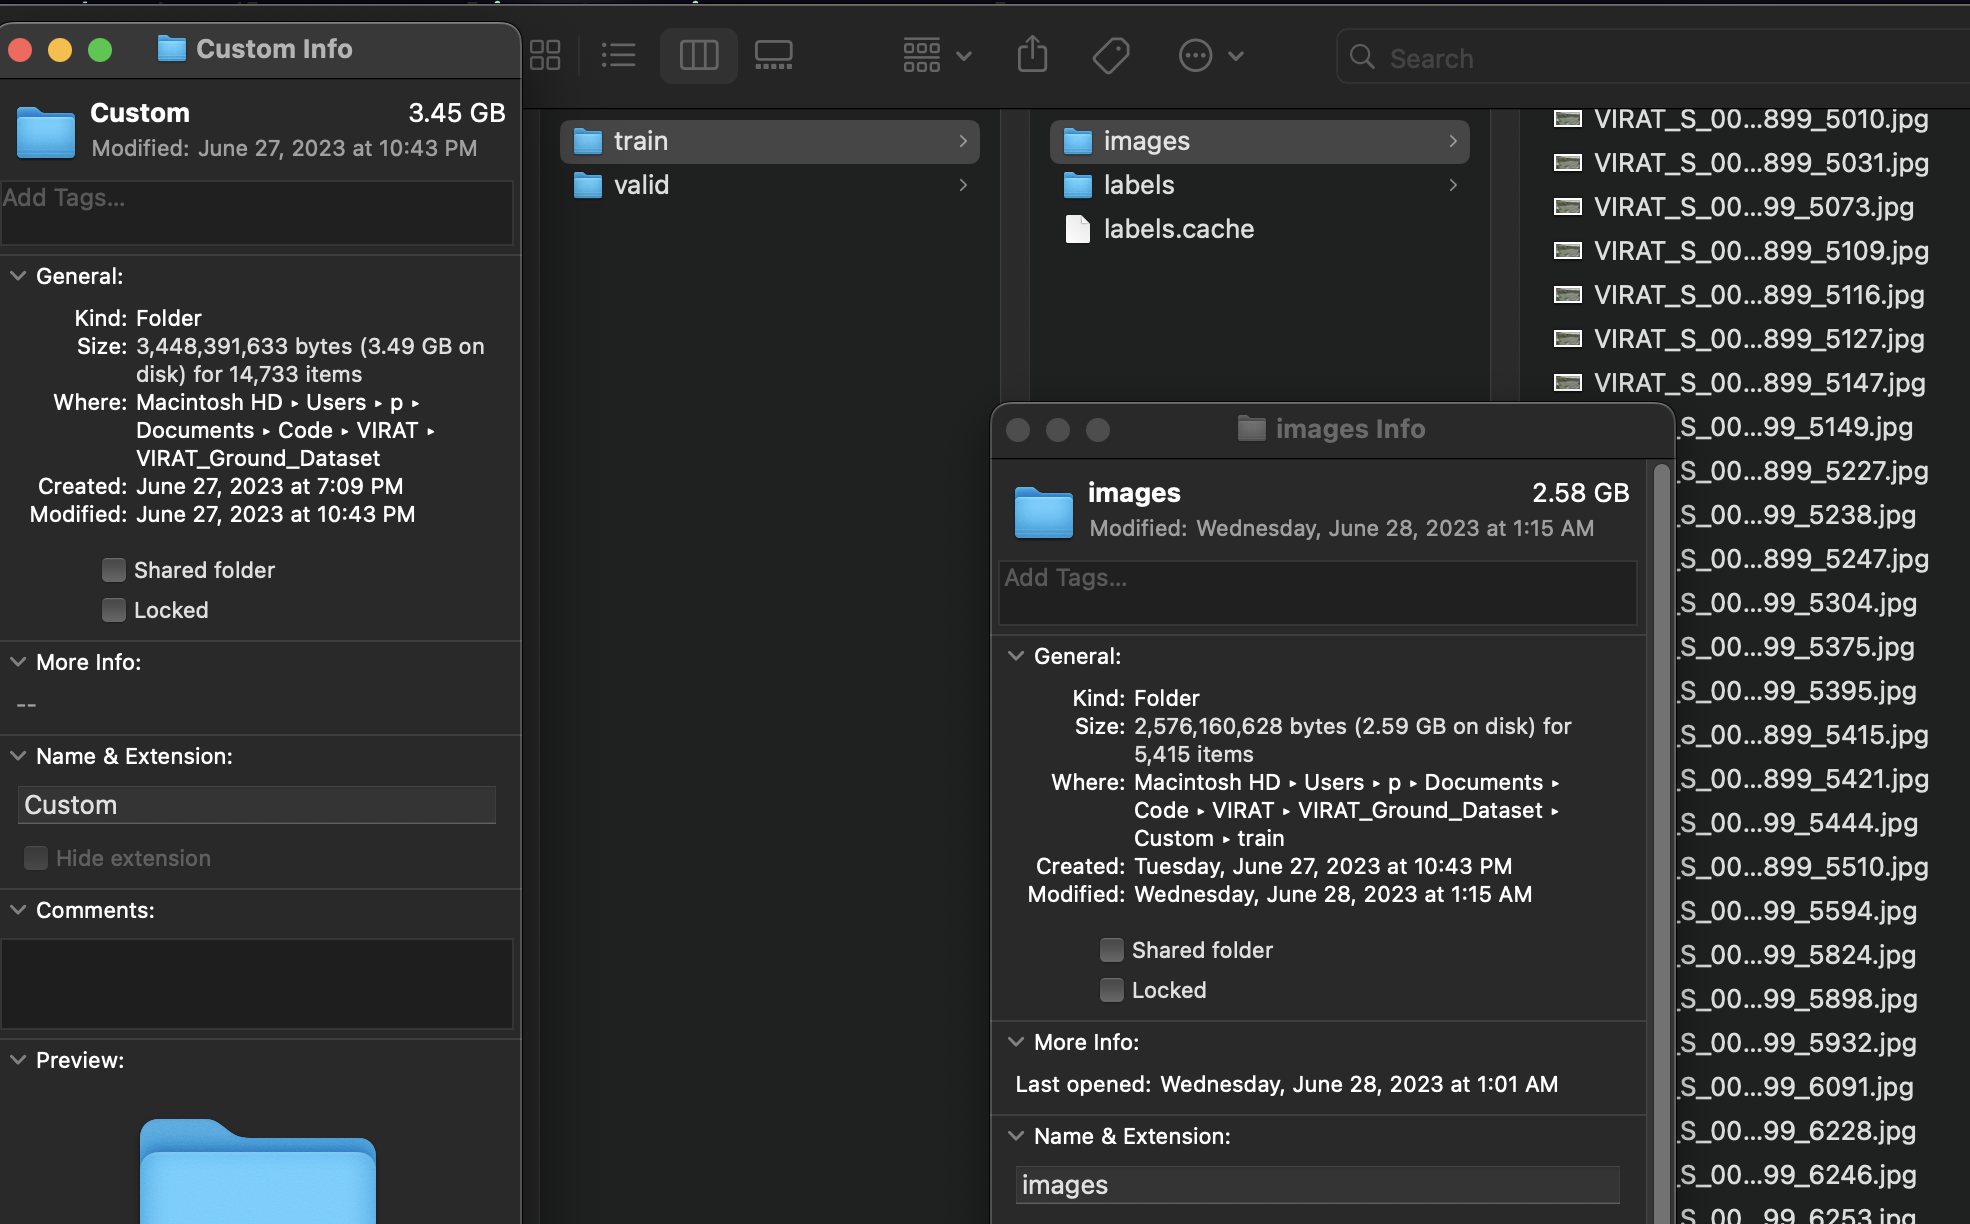

In [2]:
# show custom dataset
image_path = "/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/images/VIRAT_Custom_Data.png"
display(Image(filename=image_path))

##### Model Training on Custom Dataset
- Original Notebook: https://github.com/DawdlingDaedalus/VIRAT/blob/main/analysis/7.4-Training_on_Custom_Dataset.ipynb
- Results saved to: '/Users/p/Documents/GitHub/VIRAT/analysis/runs/detect/train3/weights/best.pt'

In [6]:
# show .yaml file passed to YOLOv8 model for training
!cat /Users/p/Documents/GitHub/VIRAT/analysis/custom.yaml

path: '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/Custom/'
train: 'train/images'
val: 'valid/images'
    
# class names
names:
    0: 'Person'
    1: 'Vehicle'


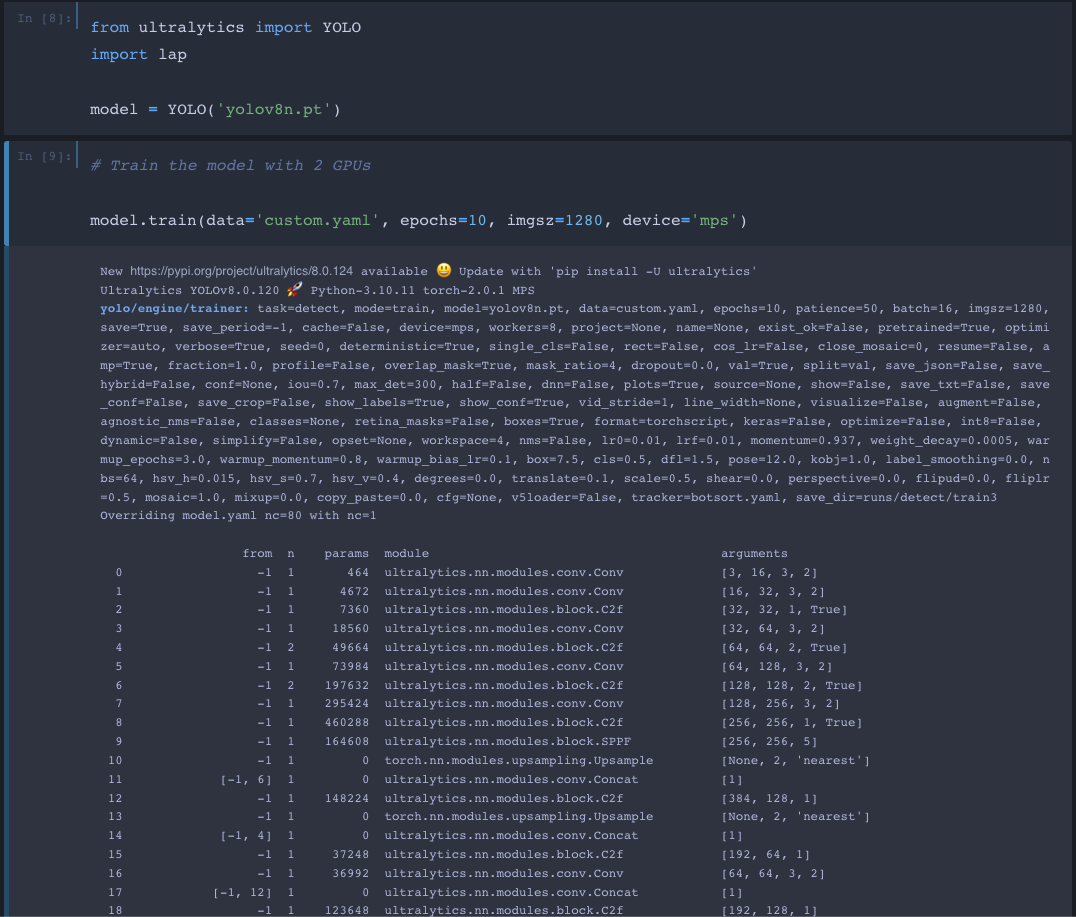

In [7]:
# From Original Notebook, show model instantiation and training

image_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/images/Model_Training_01.png'
display(Image(filename=image_path))

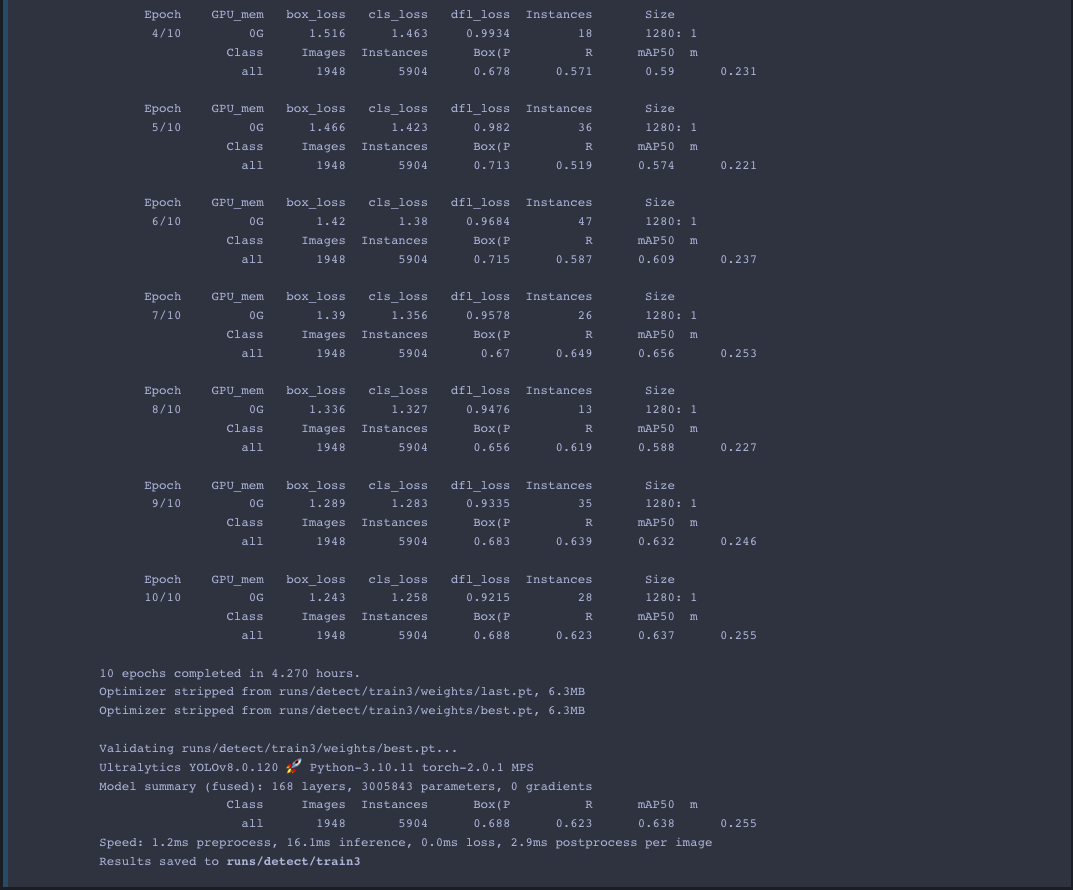

In [8]:
# show training, cont.

image_path = '/Users/p/Documents/Code/VIRAT/VIRAT_Ground_Dataset/images/Model_Training_02.png'
display(Image(filename=image_path))

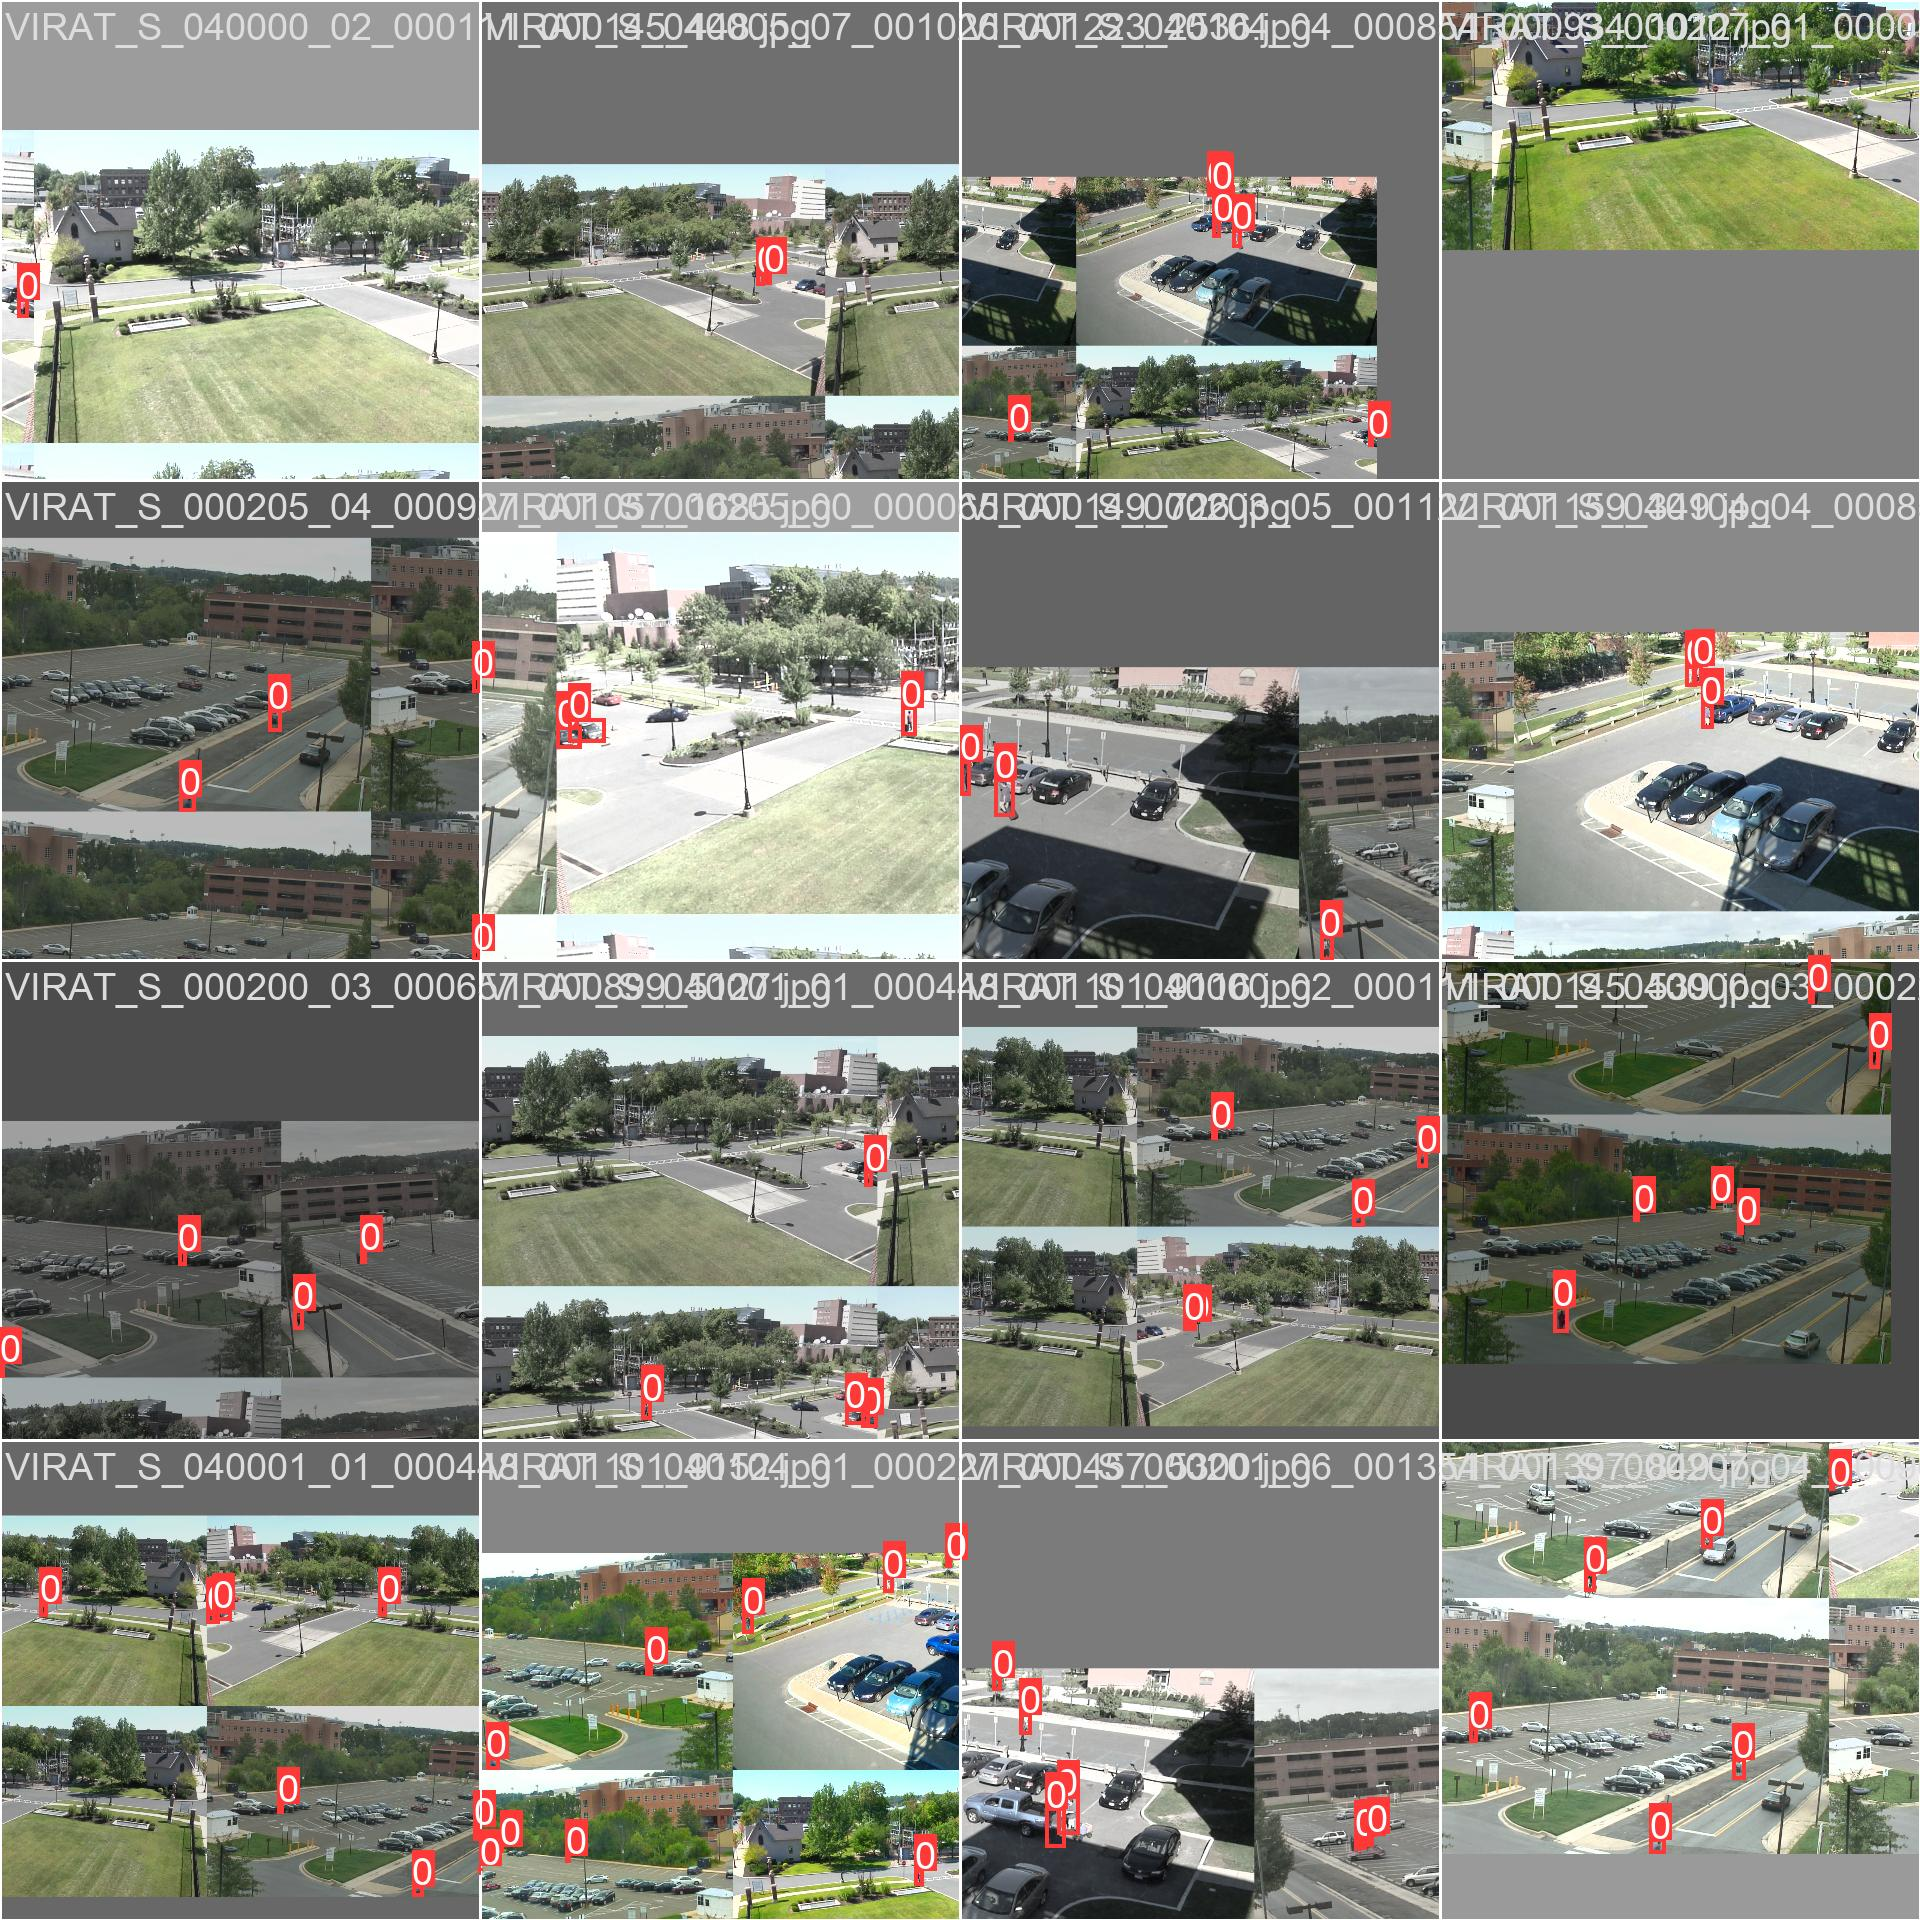

In [9]:
image_path = "/Users/p/Documents/GitHub/VIRAT/analysis/runs/detect/train3/train_batch2.jpg"
display(Image(image_path))

### 2. Problem Description

Video Surveillance is costly. Leveraging AI, we can automate detections. Storing this detections data, we can quickly search through a long period of video capture for people, cars, pets, and other detections we may want to have eyes on.

Use Cases:
1. Personal use as a home surveillance solution
    - Real-time inference from video stream
        - YOLOv8 has a `stream=True/False` parameter which allows for real-time video stream predictions
        - Need a wifi-compatible camera which can stream to a server (Local NAS System, or Cloud Server) via Real-Time Streaming Protocol (RTSP)
        - Options:
            - Wyze Cam v3 with hacked solution 
                - https://github.com/gtxaspec/wz_mini_hacks/tree/master
                - https://forums.wyze.com/t/recording-to-a-personal-cloud/219468
            - Other Wifi-capable cameras with RTSP Stream capabilities
                - https://www.epiphan.com/userguides/pearl-2/Content/capture/sourceIPCameras.htm
                </br>
                </br>
2. Business Solution for detection search and analytics
    - Batch inference at end-of-day to reduce data storage costs
        - Large video files replaced with a Relational Database and .jpgs of detections
        - Analytics can be performed on this data
        - Bad Actors can quickly be discovered based on timestamp

1. Personal use as a home surveillance solution
    - Not implemented (yet)

##### 2. Business Solution for detection search and analytics